# MNIST database of hanwritten digits

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used in the field of machine learning.

It consists of 60,000 training images and 10,000 images for testing.The images of the dataset are 28x80 pixels.

[[Wikipedia]](https://en.wikipedia.org/wiki/MNIST_database)

## Defining a Neural Network to recognize the digits

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Dropout, Input
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint
import numpy as np

Using TensorFlow backend.


In [2]:
#Loading the data using keras utility
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Printing the shape of the train and test sets
print x_train.shape
print x_test.shape

(60000, 28, 28)
(10000, 28, 28)


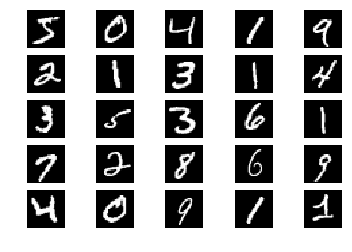

In [3]:
#Displaying a few samples of the training set
fig, ax = plt.subplots(nrows=5, ncols=5)
counter = 0
for row in ax:
    for col in row:
        col.imshow(x_train[counter], cmap = 'gray')
        col.axis("off")
        counter+=1
plt.show()

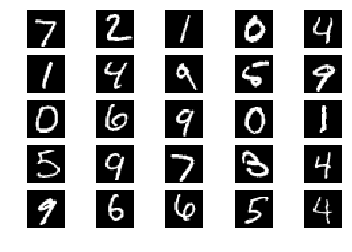

In [62]:
#Displaying a few samples of the test set
fig, ax = plt.subplots(nrows=5, ncols=5)
counter = 0
for row in ax:
    for col in row:
        col.imshow(x_test[counter], cmap = 'gray')
        col.axis("off")
        counter+=1
plt.show()

In [5]:
#Setting training parameters
batch_size = 128
num_classes = 10
epochs = 20

#Normalizing data between 0 and 1
x_train = x_train.reshape(60000, 784) #784 = 28*28
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# One hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [60]:
#Defining the Neural Network architecture
def my_model():
    inputs = Input(shape=(784,))
    out1 = Dense(512, activation='relu')(inputs)
    out2 = Dropout(0.2)(out1)
    out3 = Dense(512, activation='relu')(out2)
    out4 = Dropout(0.2)(out3)
    out5 = Dense(10, activation='softmax')(out4)
    model = Model(inputs=inputs, outputs=out5)
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    return model

In [7]:
#Building the model and showing a summary
model = my_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Checkpoint callback to save model after each improvement along the epochs
checkpoint = ModelCheckpoint('mnist_keras.model', monitor='val_loss'
                             ,verbose=0,save_weights_only= True,
                             save_best_only=True)

#Training the model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split= 0.2,callbacks = [checkpoint])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s - loss: 0.2747 - acc: 0.9146 - val_loss: 0.1346 - val_acc: 0.9607
Epoch 2/20
48000/48000 [==============================] - 5s - loss: 0.1106 - acc: 0.9665 - val_loss: 0.1029 - val_acc: 0.9695
Epoch 3/20
48000/48000 [==============================] - 4s - loss: 0.0817 - acc: 0.9757 - val_loss: 0.0897 - val_acc: 0.9732
Epoch 4/20
48000/48000 [==============================] - 5s - loss: 0.0623 - acc: 0.9810 - val_loss: 0.0927 - val_acc: 0.9763
Epoch 5/20
48000/48000 [==============================] - 5s - loss: 0.0487 - acc: 0.9851 - val_loss: 0.0970 - val_acc: 0.9757
Epoch 6/20
48000/48000 [==============================] - 5s - loss: 0.0436 - acc: 0.9867 - val_loss: 0.0962 - val_acc: 0.9777
Epoch 7/20
48000/48000 [==============================] - 5s - loss: 0.0360 - acc: 0.9886 - val_loss: 0.0917 - val_acc: 0.9795
Epoch 8/20
48000/48000 [==============================] - 5s 

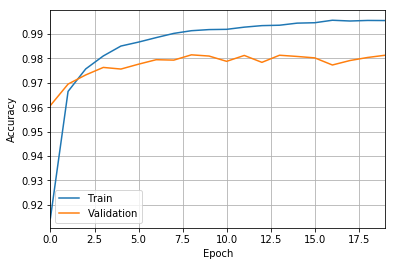

In [9]:
#Plot accuracy history
plt.plot(history.history['acc'], label = "Train")
plt.plot(history.history['val_acc'],label = "Validation")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.xlim(0,19)
plt.grid()
plt.show()

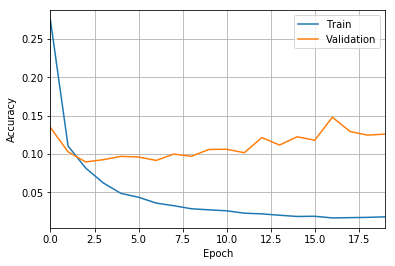

In [10]:
#Plot the loss history
plt.plot(history.history['loss'], label = "Train")
plt.plot(history.history['val_loss'],label = "Validation")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.xlim(0,19)
plt.grid()
plt.show()

In [11]:
#Load the best_model during training
best_model = my_model()
best_model.load_weights('mnist_keras.model')

In [15]:
#Evaluate the model on the test set
score = best_model.evaluate(x_test, y_test, verbose=0)
print 'Test loss: %f' %score[0]
print 'Test accuracy: %f' %score[1]

Test loss: 0.080738
Test accuracy: 0.975500


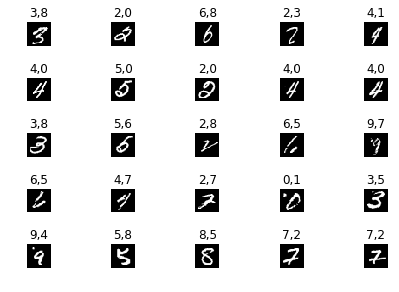

In [45]:
# Run predicition
ypred = best_model.predict(x_test).argmax(axis = 1)
y_test2 = y_test.argmax(axis = 1)

# See samples where prediction failed
indexes = np.where(ypred!=y_test2)[0][::-1]

#Display some of the errors
x_test = x_test.reshape(-1,28,28)
fig, ax = plt.subplots(nrows=5, ncols=5)
plt.tight_layout()
counter = 0
for row in ax:
    for col in row:
        aux = indexes[counter]
        col.imshow(x_test[aux], cmap = 'gray')
        col.axis("off")
        col.set_title("%d,%d" %(y_test2[aux],ypred[aux]))
        counter+=1
plt.show()

(784, 512)


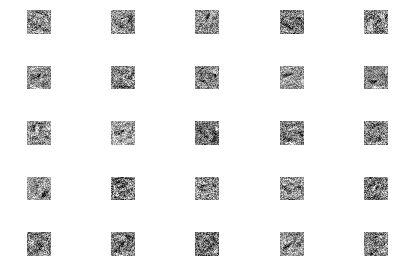

In [59]:
weights, biases = best_model.layers[1].get_weights()
print weights.shape
fig, ax = plt.subplots(nrows=5, ncols=5)
plt.tight_layout()
counter = 0
for row in ax:
    for col in row:
        aux = indexes[counter]
        col.imshow(weights[:,-counter].reshape(28,28), cmap = 'gray')
        col.axis("off")
        counter+=1
plt.show()

In [61]:
best_model.layers_by_depth

{0: [<keras.layers.core.Dense at 0x12171ec10>],
 1: [<keras.layers.core.Dropout at 0x121791090>],
 2: [<keras.layers.core.Dense at 0x12e312c90>],
 3: [<keras.layers.core.Dropout at 0x1218c97d0>],
 4: [<keras.layers.core.Dense at 0x12179c2d0>],
 5: [<keras.engine.topology.InputLayer at 0x1218c9310>]}